In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

In [174]:
run_type="shield"
num_it = "250"
datetime = "14-Aug-2022-(21:56:20)"

dirname = "../run_" + run_type + "_" + num_it + "_" + datetime

In [175]:
ret = np.load(dirname + '/eval.npy', allow_pickle=True)
avgrets = []
avglengths = []
maxtile = []
for r in ret:
    avgrets.append(r[0])
    avglengths.append(r[1])
    maxtile.append(r[2])

loss = np.load(dirname + '/losses.npy')

In [166]:
avgrets = np.array(avgrets)
avgrets /= 100

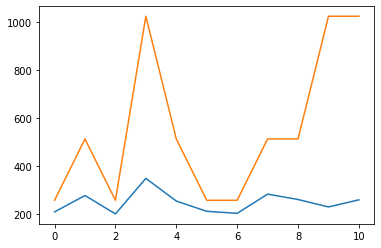

In [173]:
plt.plot(avglengths)
plt.plot(maxtile)

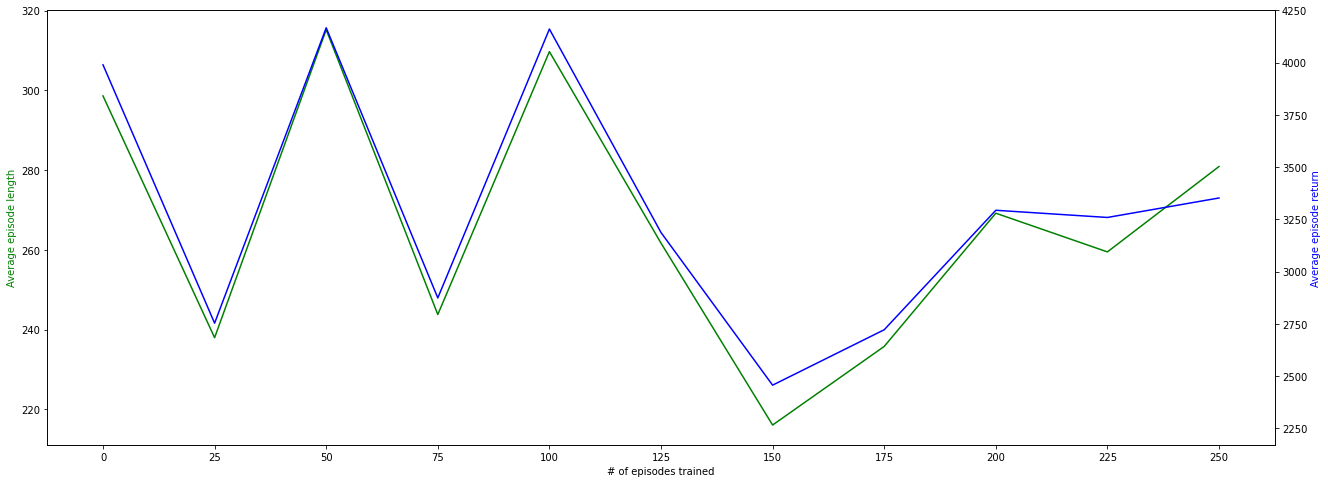

Text(0, 0.5, 'Maximum tile value')

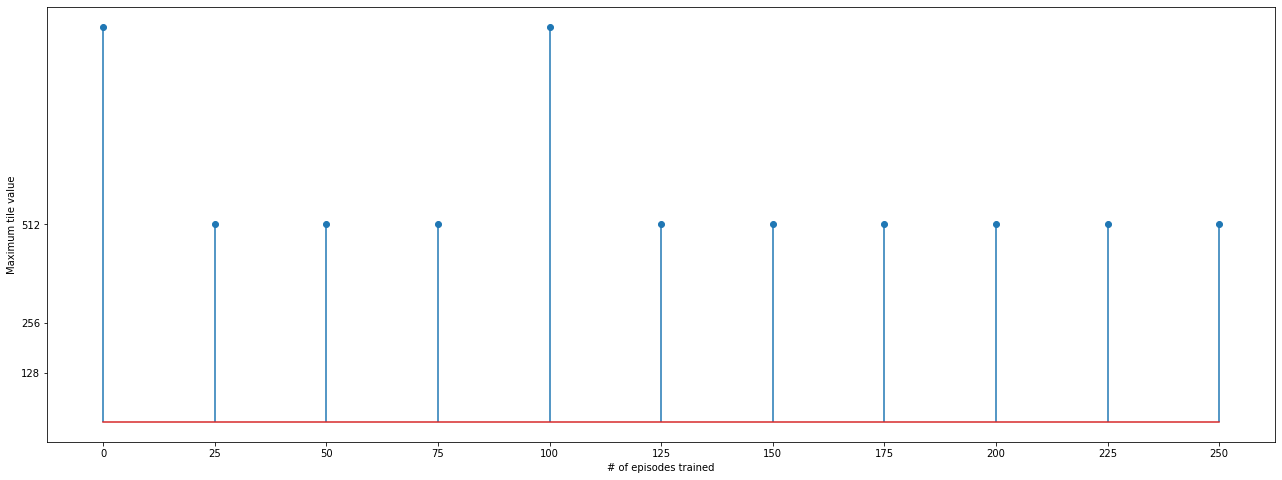

In [178]:
fig, ax1 = plt.subplots()
fig.set_size_inches(22,8)
x = np.arange(1, len(avglengths) + 1)
ax2 = ax1.twinx()
ax1.plot(x, avglengths, 'g-')
ax2.plot(x, avgrets, 'b-')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax1.set_xlabel("# of episodes trained")
ax1.set_ylabel('Average episode length', color='g')
ax2.set_ylabel('Average episode return', color='b')
ax1.set_xticks(range(1,len(avglengths) + 1))
ax1.set_xticklabels(range(0,251,25))
plot_margin = 200

x0, x1, y0, y1 = plt.axis()
plt.axis((x0,
          x1,
          y0 - plot_margin,
          y1))


#ax1.set_xticklabels(['0','0','25','50','75','100'])
plt.show()
fig, ax3 = plt.subplots()
fig.set_size_inches(22,8)
ax3.stem(maxtile)
ax3.set_yticks([128,256,512])
ax3.set_xticks(range(0,len(avglengths)))
ax3.set_xticklabels(range(0,251,25))
ax3.set_xlabel("# of episodes trained")
ax3.set_ylabel("Maximum tile value")


Text(0, 0.5, 'Loss')

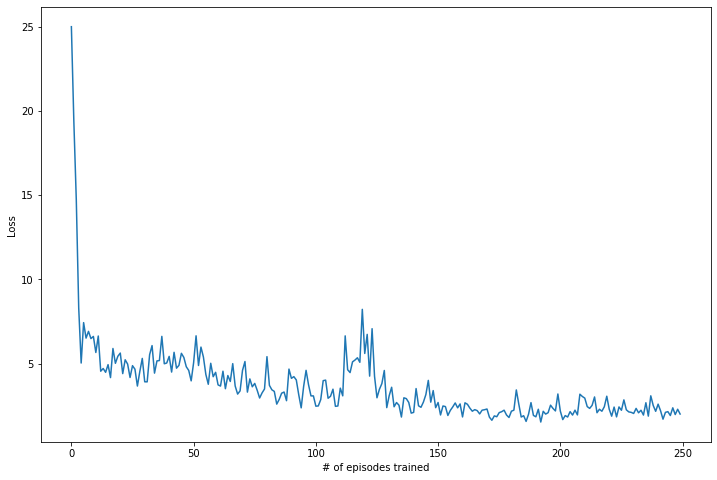

In [179]:
fig, ax1 = plt.subplots()

fig.set_size_inches(12,8)
plt.plot(loss)
plt.xlabel("# of episodes trained")
plt.ylabel("Loss")

In [145]:
def getShortestPathToTileValue(tileval):
    maxtilenp = np.array(maxtile)
    indices = (maxtilenp == tileval).nonzero()[0]
    firstbatchlengths = np.array(avglengths)[indices]
    firstbatchrets = np.array(avgrets)[indices]
    print(firstbatchlengths)

    return {
        'ln': firstbatchlengths,
        'ret': firstbatchrets
    }

In [146]:
print(getShortestPathToTileValue(128))
print(getShortestPathToTileValue(256))
print(getShortestPathToTileValue(512))

[]
{'ln': array([], dtype=float64), 'ret': array([], dtype=float64)}
[198.9 197.8 145.7 202.8 221.7 215.3 246.4 180.1 237.  191.4 166.2 227.7
 198.  183.7 186.9 212.5 235.5 214.3 227.8 250.7 244.1 218.4 217.2 216.7
 258.6 225.5 208.1]
{'ln': array([198.9, 197.8, 145.7, 202.8, 221.7, 215.3, 246.4, 180.1, 237. ,
       191.4, 166.2, 227.7, 198. , 183.7, 186.9, 212.5, 235.5, 214.3,
       227.8, 250.7, 244.1, 218.4, 217.2, 216.7, 258.6, 225.5, 208.1]), 'ret': array([221279.59375 , 229244.40625 , 101874.796875, 232821.59375 ,
       261146.40625 , 252532.796875, 350401.1875  , 177175.59375 ,
       309497.1875  , 181144.796875, 148819.203125, 323720.40625 ,
       238871.203125, 186419.59375 , 184109.203125, 252015.203125,
       322132.40625 , 264254.8125  , 318320.8125  , 350354.8125  ,
       336930.40625 , 261030.796875, 268580.40625 , 251137.59375 ,
       398342.8125  , 281314.      , 246659.203125])}
[210.4 236.5 251.2 235.3 220.5 264.5 224.7 239.4 264.5 247.8 218.8 259.7
 223.1 239

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10')]

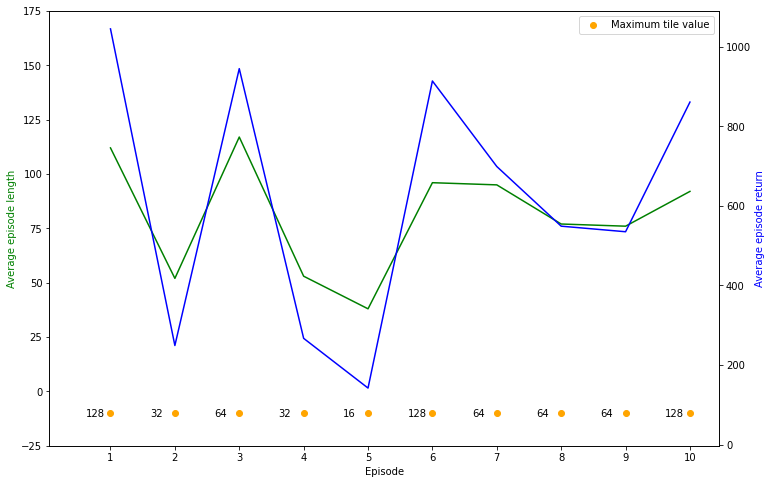

In [87]:
from matplotlib.ticker import MaxNLocator

fig, ax1 = plt.subplots()
fig.set_size_inches(12,8)
x = np.arange(1, 11)
ax2 = ax1.twinx()
ax1.plot(x, ret[1], 'g-')
ax2.plot(x, ret[0], 'b-')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax1.set_xlabel("Episode")
ax1.set_ylabel('Average episode length', color='g')
ax2.set_ylabel('Average episode return', color='b')

ax1.scatter(x, np.full(10,-10), color='orange', label='Maximum tile value')
ax1.legend(loc='upper right')
ax1.set_ylim([-25, 175])

plot_margin = 100

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - 0.5,
          x1,
          y0 - plot_margin,
          y1))

for i, txt in enumerate(ret[2]):
    ax1.annotate(int(txt), (x[i], -10), xytext=(-25,-3.5), textcoords='offset points')

ax1.set_xticks(x)
ax1.set_xticklabels(range(1,11))